# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers =city_data_df.groupby(["type"]).sum()["driver_count"]

total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 

average_fare_per_ride= total_fares / total_rides

average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares / total_drivers

average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
         {"Total Rides": total_rides, 
          "Total Drivers": total_drivers, 
          "Total Fares": total_fares,
              "Average Fare per Ride": average_fare_per_ride, 
          "Average Fare per Driver": average_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.


pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)


pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame

pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

date_and_type_fare_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]


date_and_type_fare_df.head(10)


fare
type  date                   
Rural 2019-01-01 9:45   43.69
      2019-01-02 11:18  52.12
      2019-01-03 19:51  19.90
      2019-01-04 3:31   24.88
      2019-01-06 7:38   47.33
      2019-01-08 6:19   19.39
      2019-01-09 15:30  31.84
      2019-01-11 4:39   16.42
      2019-01-14 15:58  54.10
      2019-01-14 7:09   18.05

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

date_and_type_fare_df = date_and_type_fare_df.reset_index()


date_and_type_fare_df.head()


,type,date,fare
0,Rural,2019-01-01 9:45,43.69
1,Rural,2019-01-02 11:18,52.12
2,Rural,2019-01-03 19:51,19.90
3,Rural,2019-01-04 3:31,24.88
4,Rural,2019-01-06 7:38,47.33


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

date_and_type_fare_pivot_df = pd.pivot_table(date_and_type_fare_df, index="date", columns="type", values="fare")

date_and_type_fare_pivot_df.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
2019-01-01 14:52,NaN,31.15,NaN
2019-01-01 17:22,NaN,NaN,42.11
2019-01-01 21:04,NaN,NaN,11.71
2019-01-01 2:07,NaN,24.07,NaN


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

date_and_type_fare_piv_df = date_and_type_fare_pivot_df.loc["2019-01-01": "2019-04-29"]

date_and_type_fare_piv_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34,NaN,NaN,40.46
2019-04-28 8:15,NaN,NaN,22.86
2019-04-28 9:03,NaN,NaN,15.00


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

date_and_type_fare_piv_df.index = pd.to_datetime(date_and_type_fare_piv_df.index)

date_and_type_fare_piv_df



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()

date_and_type_fare_piv_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

resample_date_and_type_fare_piv_df = date_and_type_fare_piv_df.resample("W").sum()

resample_date_and_type_fare_piv_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<function matplotlib.pyplot.show(close=None, block=None)>

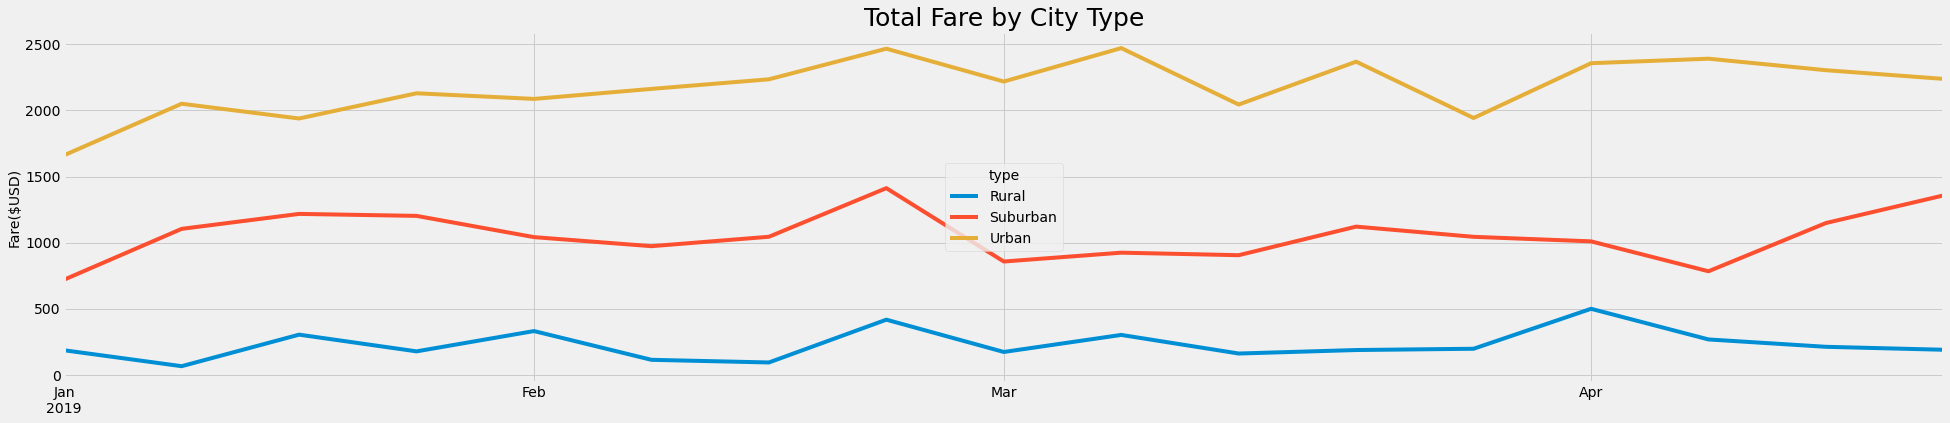

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.

from matplotlib import style

# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')

# plotting the chart

ax = resample_date_and_type_fare_piv_df.plot(figsize = (30,6))


# label the chart

plt.title("Total Fare by City Type", fontsize=25)

plt.ylabel("Fare($USD)", fontsize=14)

plt.xlabel("", fontsize=0)


# save the Figure

plt.savefig("analysis/PyBer_Fare.png")

# show the chart

plt.show
